# Credit Risk Decision Support System with Bayes Network

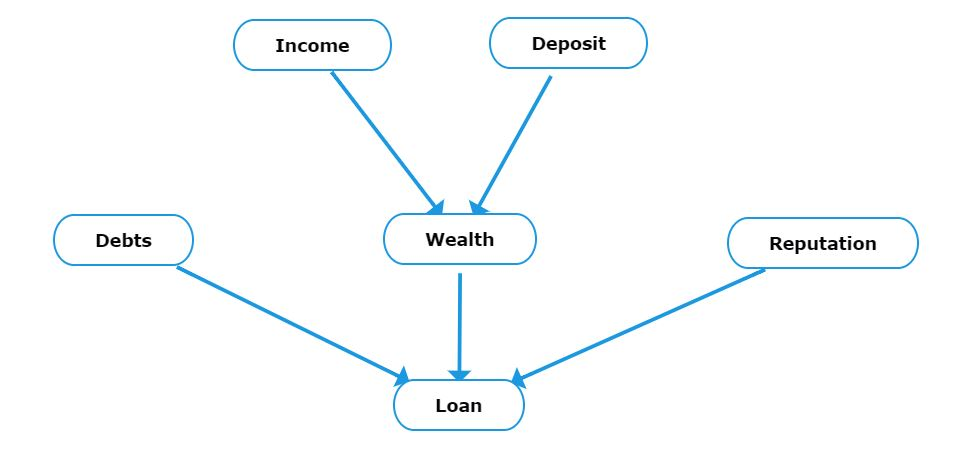

In [1]:
import numpy as np

In [2]:
from pgmpy.factors.discrete import TabularCPD

In [3]:
from pgmpy.models import BayesianNetwork

In [4]:
document_model = BayesianNetwork([('Income', 'Value'),
                               ('Assets', 'Value'),
                               ('Loan', 'Approve'),
                               ('Credit_Score', 'Approve'),
                               ('Value', 'Approve')])

In [5]:
income_cpd = TabularCPD(
    variable = 'Income',
    variable_card = 3, #high income,medium income, low income
    values = [[.2],[.5],[.3]])

In [6]:
assets_cpd = TabularCPD(
    variable = 'Assets',
    variable_card = 3, #large, medium, small
    values = [[.1],[.3],[.6]])

In [7]:
value_cpd = TabularCPD(
    variable = 'Value',
    variable_card = 3, # high, medium, low
    values = [[.9,.7,.5,.4,.1,.05,.05,0,0],
              [.1,.3,.4,.5,.7,.5,.35,.2,.1],
             [0,0,.1,.1,.2,.45,.6,.8,.9]],
    evidence = ['Income','Assets'],
    evidence_card = [3,3])

In [8]:
loan_cpd = TabularCPD(
    variable = 'Loan',
    variable_card = 3, #low ammount, medium ammount, high ammount
    values = [[.3],[.5],[.2]])

In [9]:
cs_cpd = TabularCPD(
    variable = 'Credit_Score',
    variable_card = 2, #good, bad
    values = [[.7],[.3]])

In [10]:
approve_cpd = TabularCPD(
    variable = 'Approve',
    variable_card = 2, # yes,no   #|medium value    #| low value
    values = [[.99,.6,.9,.5,.8,.3,.7,.4,.5,.2,.2,.1,.3,.01,.1,.005,.05,0],
             [.01,.4,.1,.5,.2,.7,.3,.6,.5,.8,.8,.9,.7,.99,.9,.995,.95,1]],
    evidence = ['Value','Loan','Credit_Score'],
    evidence_card = [3,3,2])

In [11]:
document_model.add_cpds(income_cpd,assets_cpd,value_cpd,loan_cpd,cs_cpd,approve_cpd)

In [12]:
document_model.get_cpds()

[<TabularCPD representing P(Income:3) at 0x1949e862700>,
 <TabularCPD representing P(Assets:3) at 0x194ade09070>,
 <TabularCPD representing P(Value:3 | Income:3, Assets:3) at 0x194adf1e370>,
 <TabularCPD representing P(Loan:3) at 0x19489f280a0>,
 <TabularCPD representing P(Credit_Score:2) at 0x194ade13ac0>,
 <TabularCPD representing P(Approve:2 | Value:3, Loan:3, Credit_Score:2) at 0x194adf1e760>]

In [13]:
document_model.get_independencies()

(Income ⟂ Loan, Assets, Credit_Score)
(Income ⟂ Loan, Credit_Score, Approve | Value)
(Income ⟂ Assets, Credit_Score | Loan)
(Income ⟂ Loan, Credit_Score | Assets)
(Income ⟂ Loan, Assets | Credit_Score)
(Income ⟂ Credit_Score, Approve | Value, Loan)
(Income ⟂ Loan, Credit_Score, Approve | Value, Assets)
(Income ⟂ Loan, Approve | Value, Credit_Score)
(Income ⟂ Loan, Credit_Score | Value, Approve)
(Income ⟂ Credit_Score | Loan, Assets)
(Income ⟂ Assets | Loan, Credit_Score)
(Income ⟂ Loan | Assets, Credit_Score)
(Income ⟂ Credit_Score, Approve | Value, Loan, Assets)
(Income ⟂ Approve | Value, Loan, Credit_Score)
(Income ⟂ Credit_Score | Value, Loan, Approve)
(Income ⟂ Loan, Approve | Value, Assets, Credit_Score)
(Income ⟂ Loan, Credit_Score | Value, Assets, Approve)
(Income ⟂ Loan | Value, Credit_Score, Approve)
(Income ⟂ Approve | Value, Loan, Credit_Score, Assets)
(Income ⟂ Credit_Score | Value, Loan, Assets, Approve)
(Income ⟂ Loan | Value, Assets, Credit_Score, Approve)
(Value ⟂ Loan,

In [14]:
from pgmpy.inference import VariableElimination

In [15]:
approve_infer=VariableElimination(document_model)

In [16]:
# approved loans
prob_loan = approve_infer.query(variables=['Approve'],joint=False)
print(prob_loan['Approve'])

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

+------------+----------------+
| Approve    |   phi(Approve) |
+============+================+
| Approve(0) |         0.3469 |
+------------+----------------+
| Approve(1) |         0.6531 |
+------------+----------------+


In [17]:
# probability to get a loan with a high value
prob_loan_hvalue = approve_infer.query(variables = ['Approve'],joint = False,
                                evidence = ({'Value' : 0}))
print(prob_loan_hvalue['Approve'])

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

+------------+----------------+
| Approve    |   phi(Approve) |
+============+================+
| Approve(0) |         0.7819 |
+------------+----------------+
| Approve(1) |         0.2181 |
+------------+----------------+


In [23]:
# credit score of people who received a loan with a low value
prob_cs_hvalue_loan = approve_infer.query(variables = ['Credit_Score'],joint = False,
                                evidence = ({'Approve' : 0,'Value' : 2}))
print(prob_cs_hvalue_loan['Credit_Score'])

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

+-----------------+---------------------+
| Credit_Score    |   phi(Credit_Score) |
+=================+=====================+
| Credit_Score(0) |              0.9845 |
+-----------------+---------------------+
| Credit_Score(1) |              0.0155 |
+-----------------+---------------------+
